In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Import EarlyStopping from keras.callbacks
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
#Loading the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Determine the number of classes
num_classes = len(set(y_train))

print("Number of classes:", num_classes)

Number of classes: 10


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

In [9]:
cnn = tf.keras.models.Sequential()

In [10]:
#Adding a convolution layer
#Input layer is implicitly added in the first convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape = (28,28,1),use_bias = True))
#Adding a Batch Normalization Layer
cnn.add(tf.keras.layers.BatchNormalization())
# Add MaxPool2D layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Repeat Conv2D and MaxPool2D layers
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu',  use_bias = True))
#Adding a Batch Normalization Layer
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', use_bias = True))
#Adding a Batch Normalization Layer
cnn.add(tf.keras.layers.BatchNormalization())

cnn.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='valid'))

# Add Flatten layer
cnn.add(tf.keras.layers.Flatten())

# Add Dense layers
cnn.add(tf.keras.layers.Dense(units=64, activation='relu', use_bias = True))
#Adding a drop out layer
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units=64, activation='relu', use_bias = True))
#Adding a drop out layer
cnn.add(tf.keras.layers.Dropout(0.2))

# Add output layer
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax', use_bias = True))

In [11]:
# Compile the model
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [12]:
# Define EarlyStopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Continue with the rest of your code
train_history = cnn.fit(x_train, y_train, epochs=16, batch_size=2048, callbacks=callback, validation_split=0.2)

Epoch 1/16
24/24 [==============================] - 37s 1s/step - loss: 1.8331 - sparse_categorical_accuracy: 0.3945 - val_loss: 1.4926 - val_sparse_categorical_accuracy: 0.5128
Epoch 2/16
24/24 [==============================] - 22s 883ms/step - loss: 1.0684 - sparse_categorical_accuracy: 0.6367 - val_loss: 1.0135 - val_sparse_categorical_accuracy: 0.7015
Epoch 3/16
24/24 [==============================] - 19s 806ms/step - loss: 0.8008 - sparse_categorical_accuracy: 0.7150 - val_loss: 0.8635 - val_sparse_categorical_accuracy: 0.7463
Epoch 4/16
24/24 [==============================] - 20s 842ms/step - loss: 0.6998 - sparse_categorical_accuracy: 0.7492 - val_loss: 0.7705 - val_sparse_categorical_accuracy: 0.7689
Epoch 5/16
24/24 [==============================] - 20s 846ms/step - loss: 0.6381 - sparse_categorical_accuracy: 0.7704 - val_loss: 0.7113 - val_sparse_categorical_accuracy: 0.7769
Epoch 6/16
24/24 [==============================] - 22s 899ms/step - loss: 0.5863 - sparse_categor

In [13]:
evaluate_history = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4065 - sparse_categorical_accuracy: 0.8576


dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


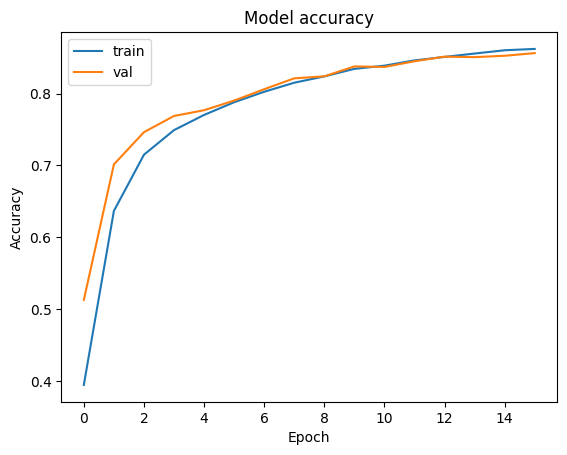

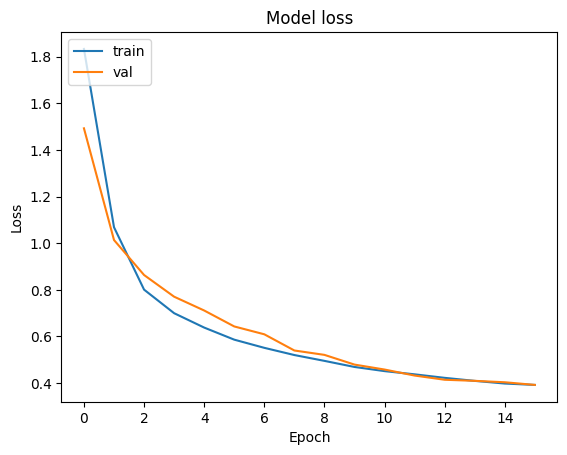

test sparse_categorical_accuracy
0.8575999736785889
test loss
0.4064936339855194


<Figure size 640x480 with 0 Axes>

In [14]:
# plot accuracy
print(train_history.history.keys())
plt.plot(train_history.history['sparse_categorical_accuracy'])
plt.plot(train_history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.clf()

print('test sparse_categorical_accuracy')
print(evaluate_history[1])
print('test loss')
print(evaluate_history[0])